In [ ]:
from analyze import analyze_color_histogram
from scg_detection_tools.models import YOLOv8
from scg_detection_tools.detect import Detector
from scg_detection_tools.utils.file_handling import read_yaml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import cv2

cfg = read_yaml("analyze_config.yaml")
model = YOLOv8(yolov8_ckpt_path=cfg["yolov8_model_path"])

det_params = cfg["detect_parameters"]
det_params["embed_slice_callback"] = None
det = Detector(detection_model=model, detection_params=det_params)


In [ ]:
IMG_DIR = "/home/julio/Dev/SCG_IFSC/datasets/gen-leaf-dataset-v4/train/images"
LBL_DIR = "/home/julio/Dev/SCG_IFSC/datasets/gen-leaf-dataset-v4/train/labels"

imgs = [
    f"{IMG_DIR}/0_640x640_png.rf.e445f1e2ec7d5f09191bbfac000f8274.jpg",
    f"{IMG_DIR}/1_640x640_png.rf.c186ca44871ae1749eec239fad71fa84.jpg",
    f"{IMG_DIR}/3_640x640_sparse_png.rf.4be15566a8c7a2ba76e1fc057f0755a3.jpg",

]

img_hists = analyze_color_histogram(model=model, detector=det, imgs=imgs, on_crops=True, cspaces=["RGB"], show=False)

In [3]:
#img_hists[imgs[0]][0].reshape(256)
print(len(img_hists[imgs[0]]["crops"][0]))


3


78.3674280039722 26.18269119876073 158.76762661370407 48.15195409512151 152.52995696789142 43.91218758049678
80.38475665748393 26.492384805310536 172.9706152433425 32.70355565552525 165.49081726354453 29.5053676487019
68.86637931034483 30.302804603335158 166.2014106583072 47.07064854155821 154.91065830721004 40.377818088778874
76.94035087719298 28.30485582077358 171.8295739348371 35.83199488183643 165.57994987468672 33.61788816999097
78.3566763425254 22.12369884290967 146.85304789550074 48.15020751204961 143.8134978229318 46.3878946484239
48.54875 26.05711911879042 156.07083333333333 48.81238725267958 146.33 44.587183509763584
116.05285412262157 21.31150942722758 186.2864693446089 35.99649628838559 183.70190274841437 33.954399890525345
57.35913879981677 23.897536996015397 171.0746678882272 34.5160961417937 159.8488318827302 30.66000298607966
74.5197072072072 18.87165205448701 168.66554054054055 47.70023780254694 158.02083333333334 42.61206891625392
36.93859649122807 27.276857065349308 

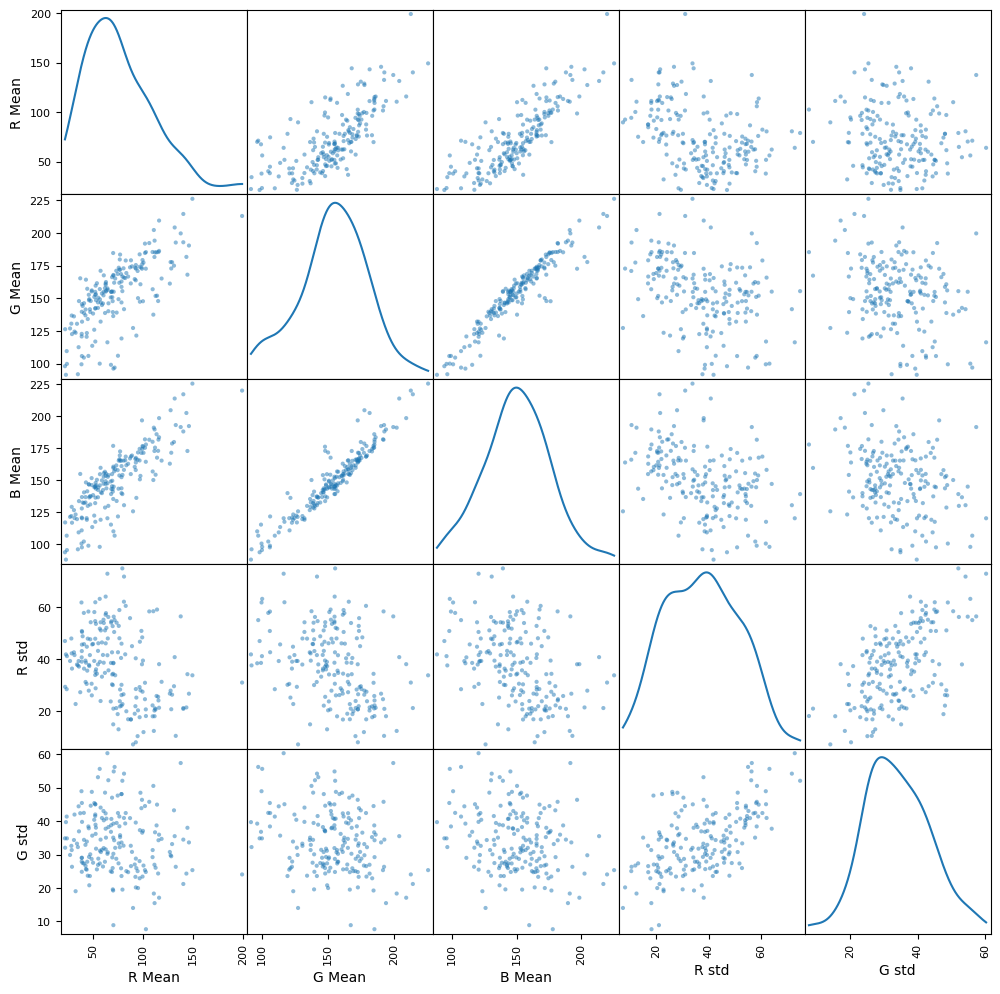

In [5]:
X = []
intensities = np.arange(256)
for img in img_hists:
    for crop in img_hists[img]["crops"]:
        r_hist, g_hist, b_hist = crop
        
        r_mean = np.sum(intensities*r_hist)/np.sum(r_hist)
        r_std = np.sqrt(np.sum((intensities - r_mean) ** 2 * r_hist) / np.sum(r_hist))
    
        g_mean = np.sum(intensities*g_hist)/np.sum(g_hist)
        g_std = np.sqrt(np.sum((intensities - g_mean) ** 2 * g_hist) / np.sum(g_hist))
        
        b_mean = np.sum(intensities*b_hist)/np.sum(b_hist)
        b_std = np.sqrt(np.sum((intensities - b_mean) ** 2 * b_hist) / np.sum(b_hist))
        
        print(r_mean, r_std, g_mean, g_std, b_mean, b_std)
        X.append([r_mean, g_mean, b_mean, r_std, g_std, b_std])


df = pd.DataFrame(X, columns=[
    "R Mean", "G Mean", "B Mean", "R std", "G std", "B std"
])
scatter_matrix(df.iloc[:,:-1], figsize=(12,12), diagonal="kde")

print(df.corr())